<a href="https://colab.research.google.com/github/ranton256/stats_notebooks/blob/main/bivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Linear Regression

## Resources

- <https://www.statology.org/bivariate-analysis-in-python/>

In [2]:
import pandas as pd


In [71]:
df = pd.DataFrame({'hours': [1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
                             3, 4, 4, 5, 5, 6, 6, 6, 7, 8],
                   'score': [75, 66, 68, 74, 78, 72, 85, 82, 90, 82,
                             80, 88, 85, 90, 92, 94, 94, 88, 91, 96]})

df.head()

,hours,score
0,1,75
1,1,66
2,1,68
3,2,74
4,2,78


Text(0, 0.5, 'Exam Score')

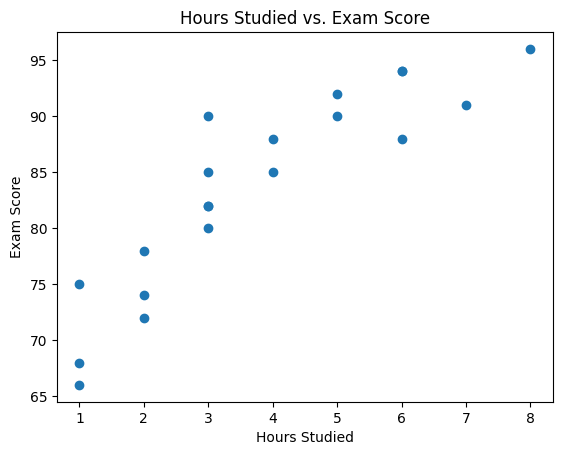

In [73]:
import matplotlib.pyplot as plt

#create scatterplot of hours vs. score
plt.scatter(df.hours, df.score)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')


In [6]:
#create correlation matrix
df.corr()


,hours,score
hours,1.000000,0.891306
score,0.891306,1.000000


In [7]:
import statsmodels.api as sm

#define response variable
y = df['score']

#define explanatory variable
x = df[['hours']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     69.56
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.35e-07
Time:                        20:42:53   Log-Likelihood:                -55.886
No. Observations:                  20   AIC:                             115.8
Df Residuals:                      18   BIC:                             117.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.0734      1.965     35.149      0.0

## Linear Regression

### Assumptions

1. Linear relationship
2. Independence
3. Homoscedasticity -  The residuals have constant variance at every level of x.
4. Normality - the residuals are normally distributed.

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(x, y)

LinearRegression()

In [11]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.7944263394515492


In [12]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


intercept: 69.07339449541284
slope: [0.        3.8470948]


predicted response:
        const      hours
0   69.073394  72.920489
1   69.073394  72.920489
2   69.073394  72.920489
3   69.073394  76.767584
4   69.073394  76.767584
5   69.073394  76.767584
6   69.073394  80.614679
7   69.073394  80.614679
8   69.073394  80.614679
9   69.073394  80.614679
10  69.073394  80.614679
11  69.073394  84.461774
12  69.073394  84.461774
13  69.073394  88.308869
14  69.073394  88.308869
15  69.073394  92.155963
16  69.073394  92.155963
17  69.073394  92.155963
18  69.073394  96.003058
19  69.073394  99.850153


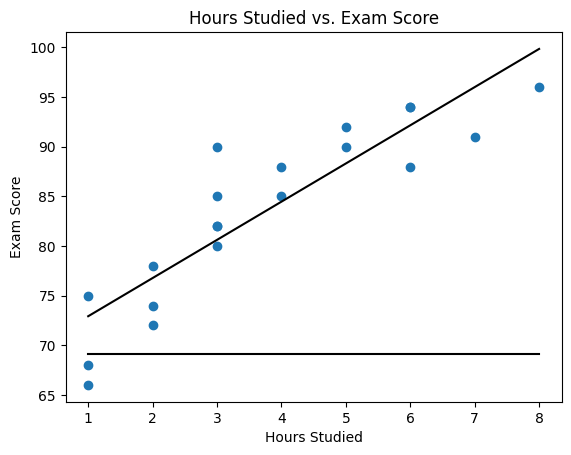

In [31]:
plt.scatter(df.hours, df.score)
plt.title('Hours Studied vs. Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

x_orig = x["hours"].to_numpy().reshape(-1, 1)

#y_fit = model.predict(x_orig)
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")
plt.plot(x_orig, y_pred, 'k-')

#plt.plot(hours, y_pred, 'k-')
# x_beg = hours[0]
# x_end = hours[-1]
# y_beg = model.predict(x_beg) # model.intercept_ + model.coef_ * x_beg
# y_end = model.predict(x_end)

# plt.plot([x_beg, x_end], [y_beg, y_end], 'r-') #, label='regression line')



# By hand

These formulas are courtesy of [Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression)

$ {\displaystyle {\widehat {\varepsilon }}_{i}=y_{i}-\alpha -\beta x_{i}}$

${\displaystyle Q(\alpha ,\beta )=\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}=\sum _{i=1}^{n}(y_{i}-\alpha -\beta x_{i})^{2}\ }$

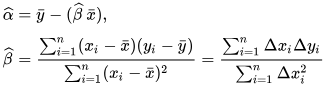


In [14]:
df.head()

,hours,score
0,1,75
1,1,66
2,1,68
3,2,74
4,2,78


In [16]:
import numpy as np

In [35]:
#X = np.array(df['hours'])
#Y = np.array(df['score'])
X = df["hours"].to_numpy().reshape(-1, 1)
Y = df["score"].to_numpy().reshape(-1, 1)


In [40]:
dx = X - X.mean()
dy = Y - Y.mean()

numer = np.dot(dx.T, dy)
denom = np.dot(dx.T, dx)

b_hat = numer / denom
a_hat = Y.mean() - b_hat * X.mean()

print(f"a_hat={a_hat}")
print(f"b_hat={b_hat}")

a_hat=[[69.0733945]]
b_hat=[[3.8470948]]


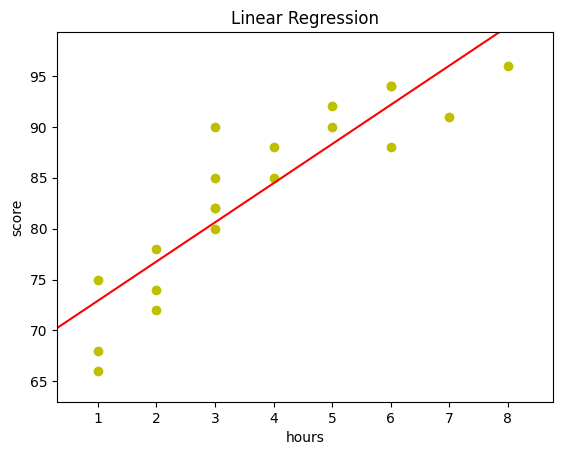

In [43]:
xmin = np.min(X)
xmax = np.max(X)
xmin -= 0.1 * (xmax - xmin)
xmax += 0.1 * (xmax - xmin)

ymin = np.min(Y)
ymax = np.max(Y)
ymin -= 0.1 * (ymax - ymin)
ymax += 0.1 * (ymax - ymin)

x_all = np.linspace(xmin, xmax, 100)
y_pr = a_hat + b_hat * x_all
y_pr = y_pr.flatten()

plt.plot(X,Y, 'yo', x_all, y_pr, 'r-')

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel('hours')
plt.ylabel('score')
plt.title('Linear Regression')

plt.show()

In [56]:
!pip install -qq seaborn

In [57]:
import seaborn as sns

In [75]:
df = sns.load_dataset("tips")

y_col = "tip"
col_names = df.columns

col_names = [c for c in col_names if c not in [y_col]]
print(f"Col_names={col_names}")



Col_names=['total_bill', 'sex', 'smoker', 'day', 'time', 'size']


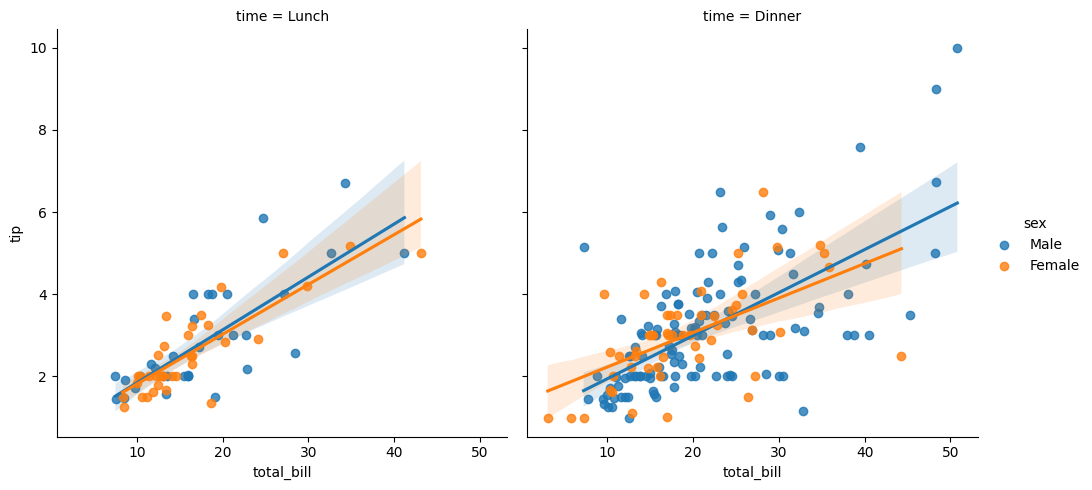

In [76]:
# for col_name in col_names:
#     sns.lmplot(data=df, x=col_name, y="tip")


sns.lmplot(
    data=df, x="total_bill", y="tip", col="time", hue="sex", col_wrap=2
)


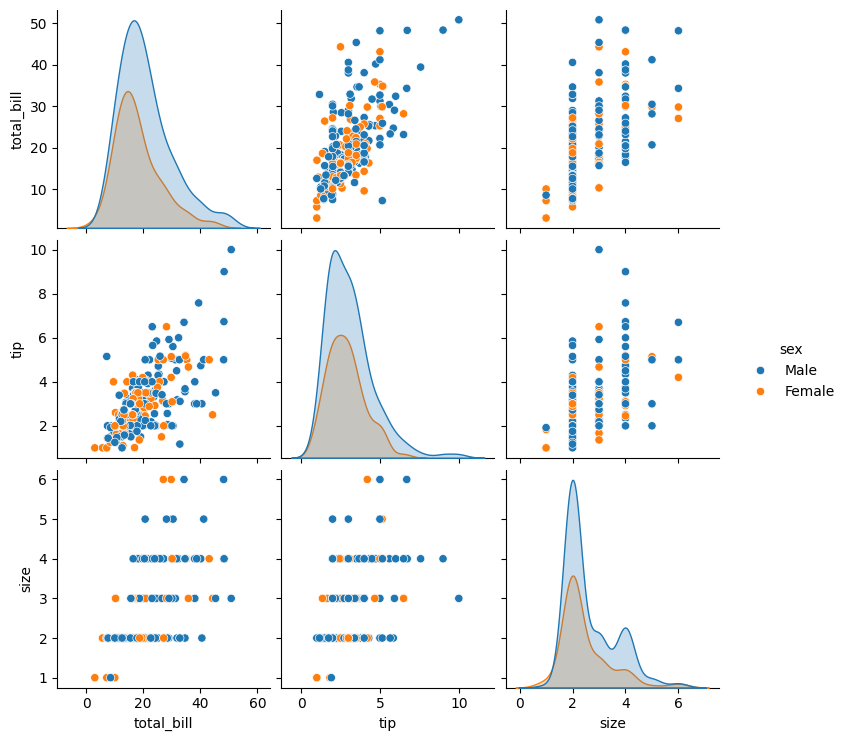

In [78]:
# Pairplot to show distributions and correlations
sns.pairplot(df, hue='sex')
plt.show()